In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
df_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('data/lending_club_loan_two.csv')

In [3]:
# Generating a quick little function to print the description of a column in the info dataframe
def feat_info(column_name):
    print (df_info.loc[column_name]['Description'])

In [4]:
 # Generating a binary 0/1 column in the dataframe for the label
df['loan_repaid'] = np.where(df['loan_status']== 'Fully Paid', 1 , 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Goals of this is to:   
- Fix missing data
- Remove unwanted/not needed features from data
- Remove duplicated features 
- Convert categorical features to integers (dummy variables)

---------------------- Dealing with missing data -----------------------------

In [7]:
# Finding out which features have missing data
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [8]:
# ------------------ 'emp title' and 'emp_lenth' --------------------

In [9]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [10]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [11]:
len(df['emp_title'].unique())

173106

In [12]:
df['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Labor Employment Specialist       1
Kuoch Corp                        1
businesses analyst                1
Acutec                            1
Process Delivery                  1
Name: emp_title, Length: 173105, dtype: int64

In [13]:
# Realistically 173,000 jobs are too many to categorise properly so I think we can drop this column
df=df.drop('emp_title',axis=1)

In [14]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

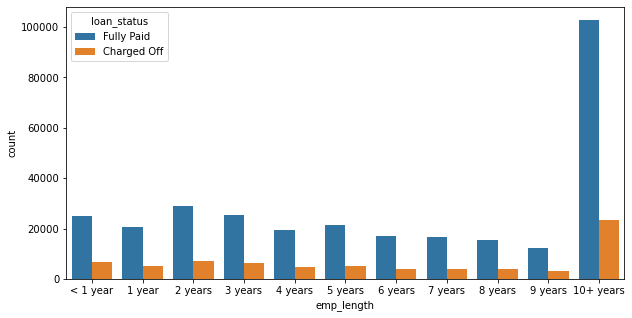

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

Vast majority of people have been employed for over 10 years, which would make sense as thats when you're likely to be getting a loan. We should look into the ratio of people that have paid off their loan vs havent for each of the categories to see if there is a trend.

<AxesSubplot:xlabel='emp_length'>

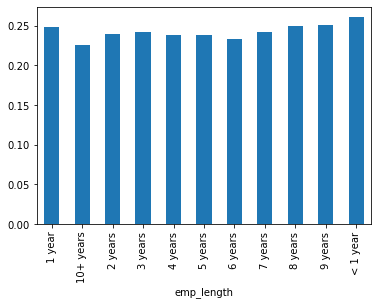

In [16]:
epl_charged = df[(df['loan_status']=='Charged Off')].groupby('emp_length').count()['loan_status']
epl_paid = df[(df['loan_status']=='Fully Paid')].groupby('emp_length').count()['loan_status']
epl_ratio = epl_charged/epl_paid
epl_ratio.plot(kind='bar')

Absolutely no correlation or trend with the label we're trying to predict so this column can go as well. 

In [17]:
df=df.drop('emp_length',axis=1)

In [18]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [19]:
# --------- 'title' -------------

In [20]:
feat_info('title')

The loan title provided by the borrower


In [21]:
len(df['title'].unique())

48818

In [22]:
df['title'].value_counts()

Debt consolidation                  152472
Credit card refinancing              51487
Home improvement                     15264
Other                                12930
Debt Consolidation                   11608
                                     ...  
Consolidate All Debt, Finish Car         1
Home Improvement/fence/pool              1
Credit card pay back                     1
I want consolidate my debt.              1
IOU consolidation                        1
Name: title, Length: 48817, dtype: int64

# Similar situation with 'emp title' too many different loan titles to really input into our dataset. This column is dropped

In [23]:
df = df.drop('title',axis=1)

In [24]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [25]:
# Going to tackle 'mort_acc' next as its got a fair amount of missing data

In [26]:
feat_info('mort_acc')

Number of mortgage accounts.


In [27]:
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [28]:
# 'Mort_acc' is the number of mortage accounts that somebody has at any one time. It should therefore correllate strongly with 'total_acc' and 'open_acc' logically....I think? 

In [29]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [30]:
# Calculating the %s of mortgage accounts from total accounts
perc_if_mort = np.mean((df[(df['mort_acc']>0)]['mort_acc'].dropna()/df[(df['mort_acc']>0)]['total_acc'])*100)

In [31]:
# If someone has some mortgage accounts they, on average, take up 13.6% of their total accounts 

In [32]:
perc_mort = np.mean((df['mort_acc'].dropna()/df['total_acc'])*100)

In [33]:
print ('Average percentage of mortage accounts of total accounts is %.2f percent' %perc_mort)

Average percentage of mortage accounts of total accounts is 6.80 percent


In [34]:
# BUT I can do this a better way and calculate the average per number of total accounts 
print ('average number of mortgage accounts as a function of total accounts')
df.groupby('total_acc').mean()['mort_acc']

average number of mortgage accounts as a function of total accounts


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

<AxesSubplot:xlabel='total_acc'>

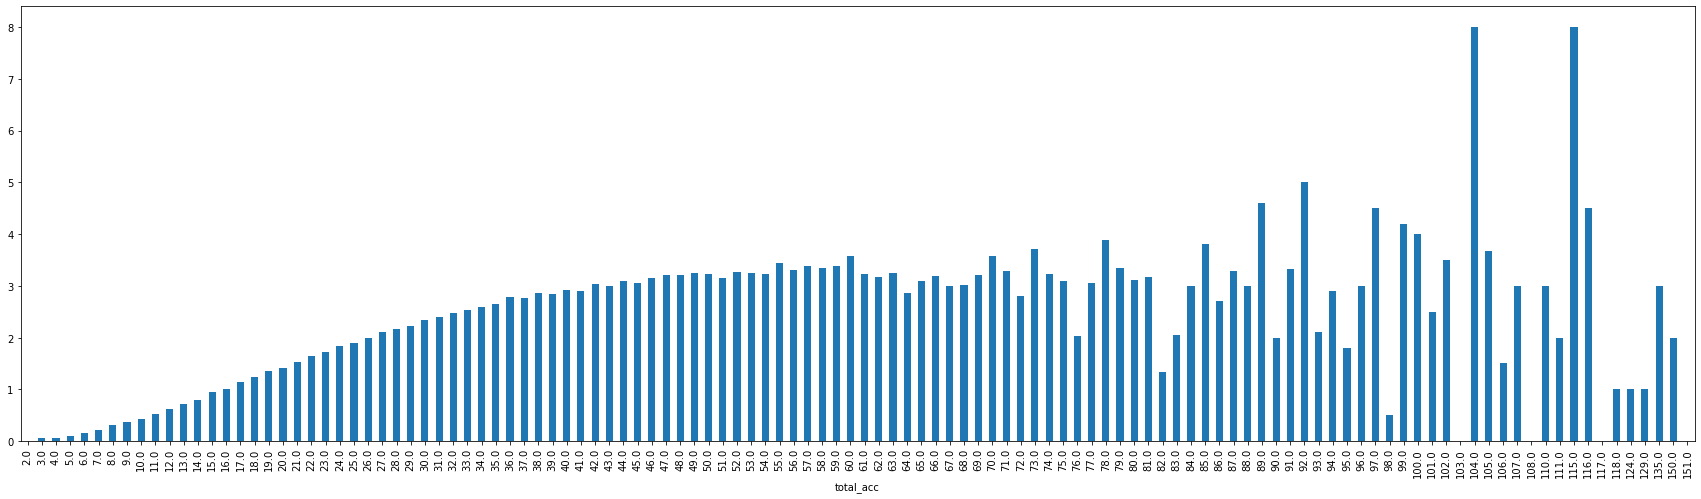

In [35]:
plt.figure(figsize=(30,8))
df.groupby('total_acc').mean()['mort_acc'].plot(kind='bar')

In [49]:
df['est_mort_acc_av'] = np.round(df['total_acc']*(perc_mort/100))
total2mort = df.groupby('total_acc').mean()['mort_acc']

In [50]:
plt.figure(figsize=(30,8))
df['est_mort_acc_av'].head(20)

0     2.0
1     2.0
2     2.0
3     1.0
4     3.0
5     2.0
6     2.0
7     1.0
8     3.0
9     3.0
10    2.0
11    4.0
12    2.0
13    2.0
14    2.0
15    2.0
16    1.0
17    1.0
18    2.0
19    3.0
Name: est_mort_acc_av, dtype: float64

<Figure size 2160x576 with 0 Axes>

In [51]:
total2mort

total_acc
2.0      0.000000
3.0      0.027523
4.0      0.046850
5.0      0.077416
6.0      0.120082
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [52]:
def fill_mort_acc(total_acc,mort_acc):

    """Function is used to fill a NaN mortgage account number with the average value calculated from each number of total                accounts 
    Input: no. of total accounts, no. of mortgage accounts 
    Output: mortgage account column with no NaN values. """

    if np.isnan(mort_acc)==True:

        mort_acc = np.round(total2mort[total_acc])
    else: 
        mort_acc

    return mort_acc

In [53]:
# Using a lambda expression to fill the NaN values in the 'mort acc' column
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
# ------------------- 'revol_util', 'pub_rec_bankruptcies' -------------------

In [56]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
est_mort_acc_av           0
dtype: int64

In [57]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [58]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [59]:
df = df.dropna()

In [60]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
est_mort_acc_av         0
dtype: int64